<a href="https://colab.research.google.com/github/fix27/Colab-Store/blob/main/FedyaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача 12. Предсказать сорт винограда из которого сделано вино, используя результаты химических анализов, c помощью KNN - метода k ближайших соседей с тремя различными метриками. Построить график зависимости величины ошибки от числа соседей k.



In [ ]:
import sklearn.neighbors
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Считываем данные:
!wget https://github.com/SemyonSinchenko/StartCode/raw/master/Agafonov2018Problem12/wine.csv


--2020-10-28 15:30:46--  https://github.com/SemyonSinchenko/StartCode/raw/master/Agafonov2018Problem12/wine.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SemyonSinchenko/StartCode/master/Agafonov2018Problem12/wine.csv [following]
--2020-10-28 15:30:46--  https://raw.githubusercontent.com/SemyonSinchenko/StartCode/master/Agafonov2018Problem12/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10781 (11K) [text/plain]
Saving to: ‘wine.csv.1’

wine.csv.1          100%[===================>]  10.53K  --.-KB/s    in 0s      

2020-10-28 15:30:46 (43.4 MB/s) - ‘wine.csv.1’ saved [10781/10781]



In [ ]:
data=pd.read_csv('wine.csv')
data.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols'
                , 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD/OD of diluted wines',
                'Proline ']
data[:10]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD/OD of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [ ]:
#Обрабатываем данные

In [ ]:
wine_data=data[data.columns[data.columns!='Class']]
wine_class=data['Class']

In [ ]:
#Обучение и подсчет ошибки

In [ ]:
neighbours=range(1,20)
metrics=['euclidean', 'manhattan', 'chebyshev']
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(wine_data, wine_class,test_size=0.77)

In [ ]:
#Построение графика зависимости ошибки от количества соседей для 3 различных метрик

In [ ]:
error=[]
for i in range(3):
    error.append([])
    for k in range(1,20):
        neighbor = sklearn.neighbors.KNeighborsClassifier(n_neighbors = k, metric= metrics[i])
        neighbor.fit(X_train,y_train)
        predictions = neighbor.predict(X_test)
        accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
        error[i].append(1-accuracy)

In [ ]:
#Построение графика зависимости ошибки от количества соседей для 3 различных метрик

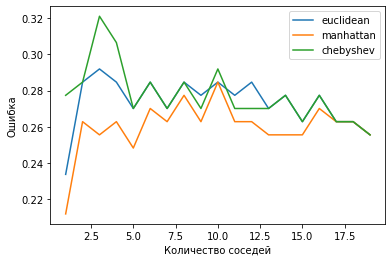

In [ ]:
plt.figure()
for i in range(3):
    plt.plot(neighbours,error[i], label=metrics[i])
plt.legend()
plt.xlabel('Количество соседей')
plt.ylabel('Ошибка')
plt.show()